In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout

Using TensorFlow backend.


In [8]:
a = np.array([[1,2],[3,4],[5,6]])
b = a.reshape(3,2,1)
print(a.shape)
print(b.shape)
print(a)
print(b)

(3, 2)
(3, 2, 1)
[[1 2]
 [3 4]
 [5 6]]
[[[1]
  [2]]

 [[3]
  [4]]

 [[5]
  [6]]]


In [9]:
data = datasets.load_digits()

X_data = data.images
y_data = data.target


print(data.images.shape)
print(y_data.shape)

(1797, 8, 8)
(1797,)


In [10]:
# X_data의 shape의 마지막 1은 filter수라고 생각하면 됌
X_data = X_data.reshape((X_data.shape[0], 
                         X_data.shape[1], 
                         X_data.shape[2], 1))  # 3차원 ->4차원

y_data = to_categorical(y_data)

# train data와 test data로 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size = 0.3, 
                                                    random_state = 777)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 8, 8, 1)
(540, 8, 8, 1)
(1257, 10)
(540, 10)


In [11]:
model = Sequential()

model.add(Conv2D(input_shape = (X_data.shape[1], 
                                X_data.shape[2], 
                                X_data.shape[3]), 
                 filters = 10, 
                 kernel_size = (3,3), 
                 strides = (1,1), 
                 padding = 'valid'))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2))) # 이것때문에 사이즈가 줄어들음


model.add(Flatten())

model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = adam, 
              metrics = ['accuracy'])

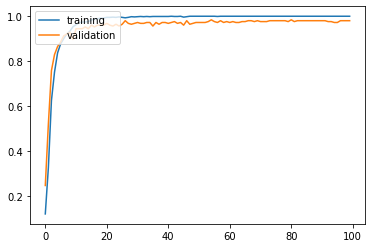

540/540 [==============================] - 0s 22us/step
Test accuracy:  0.970370352268219


In [12]:
history = model.fit(X_train, y_train, 
                    batch_size = 50, 
                    validation_split = 0.2, 
                    epochs = 100, 
                    verbose = 0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

#단순 cnn조차 금방 96% 나온다.

In [15]:
def deep_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), 
                     filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    
    model.add(Flatten())    
    model.add(Dense(50, activation = 'relu'))    
    model.add(Dense(10, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [16]:
model = deep_cnn()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 8, 8, 50)          500       
_________________________________________________________________
activation_8 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 50)          22550     
_________________________________________________________________
activation_9 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 50)          22550     
_________________________________________________________________
activation_10 (Activation)   (None, 4, 4, 50)         

In [17]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

Wall time: 20.1 s


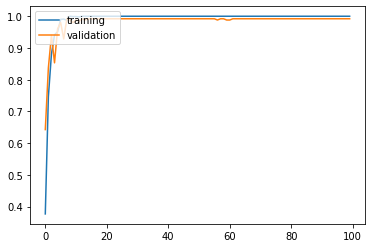

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [19]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])    # 오히려 결과가 떨어짐

540/540 [==============================] - 0s 112us/step
Test accuracy:  0.979629635810852


---

## 2. Deep CNN - 2
- Measures used to ameliorate the performance of MLPs are employed
    - Weight Initialization
    - Batch Normalization
    - Dropout

In [20]:
def deep_cnn_advanced():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [21]:
model = deep_cnn_advanced()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 8, 8, 50)          500       
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 50)          200       
_________________________________________________________________
activation_14 (Activation)   (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 50)          22550     
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 50)          200       
_________________________________________________________________
activation_15 (Activation)   (None, 8, 8, 50)          0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 50)         

In [24]:
%%time
history = model.fit(X_train, y_train, 
                    batch_size = 50, validation_split = 0.2, 
                    epochs = 100, verbose = 0)

Wall time: 29.7 s


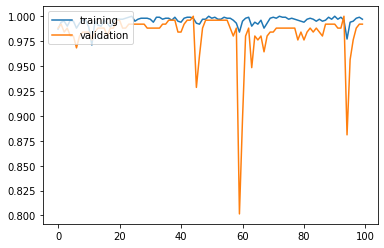

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [25]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

540/540 [==============================] - 0s 103us/step
Test accuracy:  0.9759259223937988


In [27]:
# 이걸 통해서 CNN을 깊게 설계하는 것은 어렵다는 것을 알 수 있음

----

In [30]:
model = Sequential()
    
model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), 
                     filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
    

model.add(Flatten())    
model.add(Dense(50, activation = 'relu'))    # 50은 우리가 찾아야 함
model.add(Dense(10, activation = 'softmax'))
    
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 8, 8, 10)          100       
_________________________________________________________________
activation_27 (Activation)   (None, 8, 8, 10)          0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 10)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)                8050      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                510       
Total params: 8,660
Trainable params: 8,660
Non-trainable params: 0
____________________________________________________

위에서 Parameter 개수가 100이 나온 이유는 (3 * 3 ) * 10 + 10 = 100

8050이 나온 이유는 160 * 50 + 50 = 8050

510 = 50 * 10 + 10